##Habermans Dataset information#



Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:

* Age of patient at the time of operation (numerical);
* Patient's year of operation (year - 1900, numerical) ;
* Number of positive axillary nodes detected (numerical) ;
* Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

### Objective ### 
Whether patient survived 5 years or longer OR patient died within 5 years who had undergone surgery for breast cancer.

In [1]:
#importing bunch of libbraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading data haberman.csv dataset in pandas dataframe
haberman = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/haberman.csv") #Using google colab
haberman


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [ ]:
print("Data points and features:")
print(haberman.shape)

print("\ncolumn names in our dataset:")
print(haberman.columns)

print("\nDatapoints for each class label i.e status:")
print(haberman["status"].value_counts())


Data points and features:
(306, 4)

column names in our dataset:
Index(['age', 'year', 'nodes', 'status'], dtype='object')

Datapoints for each class label i.e status:
1    225
2     81
Name: status, dtype: int64


###Conclusion###
 * Habermans data is imbalanced dataset with 306 rows and 4 columns
 * The patients who survived > 5 years are (73%) 
 * patients who died within 5 years (27%)

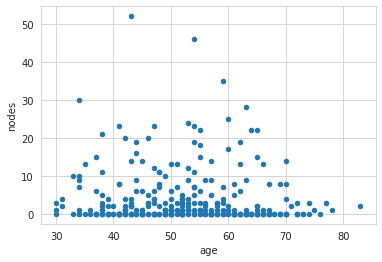

In [ ]:
#2D scatter plot 
#Bivariate analysis
haberman.plot(kind = 'scatter',y='nodes', x='age')
plt.show()

#Does not make any sense

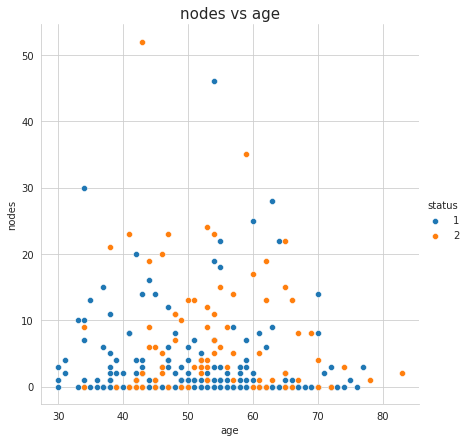

In [ ]:
#lets try by coloring points belonging to class label i.e status
sns.set_style('whitegrid')
g = sns.FacetGrid(haberman, hue='status', height=6)
g.map(sns.scatterplot,'age','nodes').add_legend()
plt.title('nodes vs age', size=15)
plt.show()


###Conclusion###

* There is high chance of patients survival more than 5 years if nodes are less than 20 and age <= 40, with 3 misclassified patients.
* In between age 50 to 60, patients who had nodes ==0 are survived > 5 years
 

  ## scatter plot ##

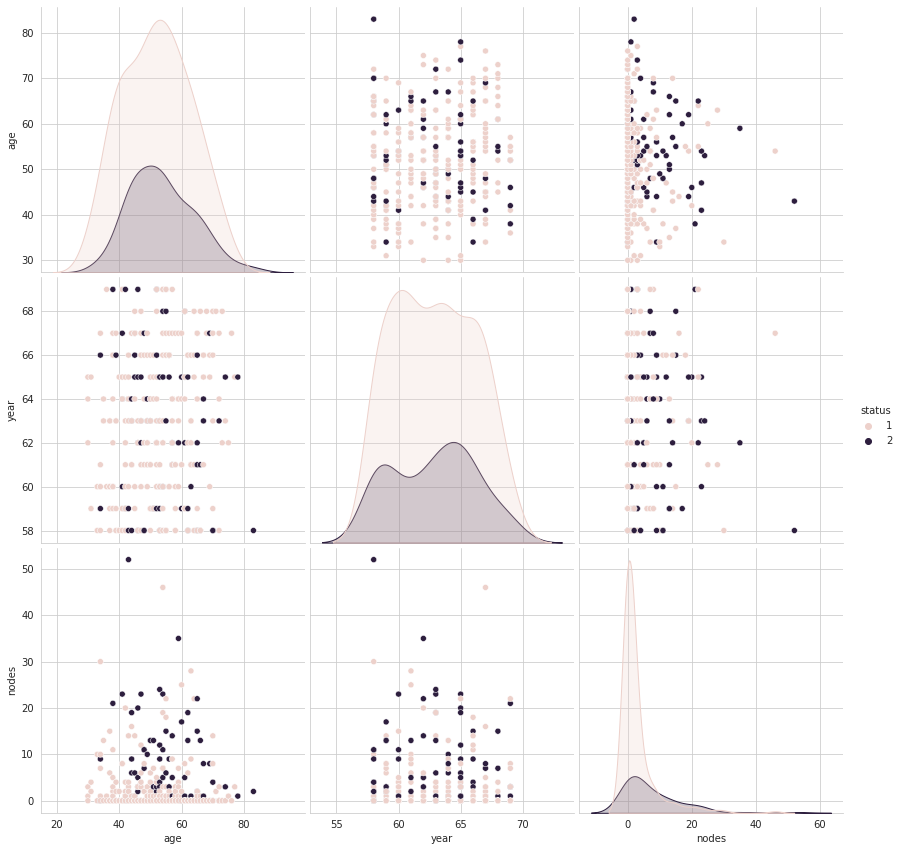

In [ ]:
#pairwise scatter plor: pair plot
#we have 3 datapoints in 2D, so 3c2= 3 pair plots

sns.set_style('whitegrid')
sns.pairplot(haberman, hue='status', kind='scatter',height=4)
plt.show()

###Conclusion###
* nodes and age are the comparitively useful feature
* But we cannot seperate the status by drawing lines i.e by using if else condition, as they are overlapping

##Univariate analysis##

In [10]:
haberman_1=haberman.loc[haberman['status']==1]
haberman_2=haberman.loc[haberman['status']==2]

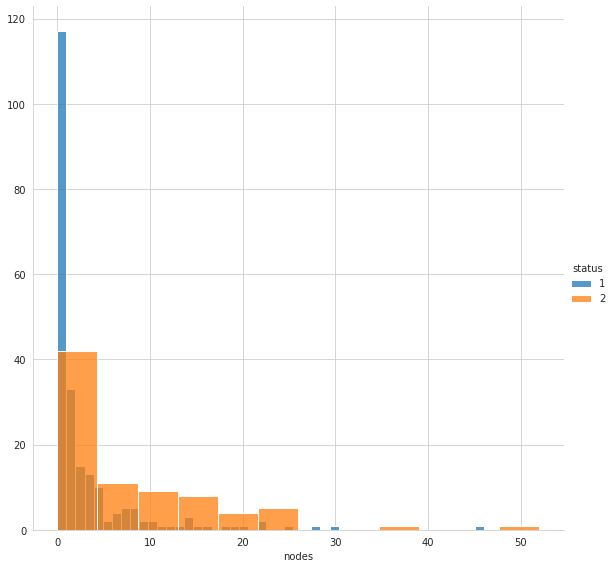

In [ ]:
#Plotting histogram for nodes
h=sns.FacetGrid(haberman, hue="status", height=8) 
h.map(sns.histplot, "nodes") .add_legend();
plt.show()

###conclusion###
* Most of the patients who survived > 5 years have nodes < 5 also majority of the patients who survived < 5 years, are also belongs to the nodes < 5


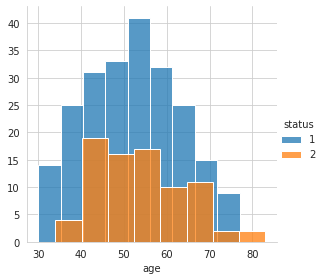

In [ ]:
#Plotting histogram for age
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(sns.histplot, "age") \
   .add_legend();
plt.show()

###Conclusion###
* patients who survived > 5 years belong to age group of 30 to 76
* patients who survived < 5 years belong to age group of 35 to 83
* Patients whose age < 33 years survived > 5 years irrespective of nodes.
* Patients whose age > 76 years are not survived > 5 years irrespective of nodes.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


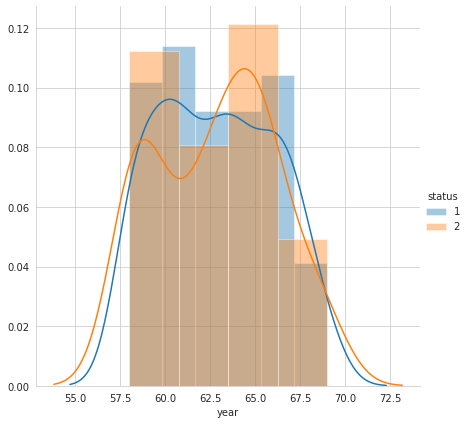

In [ ]:
#Plotting histogram for year
sns.FacetGrid(haberman, hue="status", height=6) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show()

###Conclusion###
* In year 60 to 62 highest patients survived > 5 years 
* In year 64 to 66 lowest patients survived > 5 years

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


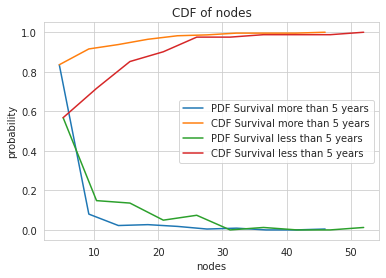

In [ ]:
#PDF does not provide any information about probability
#Let's Draw CDF

counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF Survival more than 5 years')
plt.plot(bin_edges[1:],cdf, label='CDF Survival more than 5 years')


counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF Survival less than 5 years')
plt.plot(bin_edges[1:],cdf,label='CDF Survival less than 5 years')


plt.title("CDF of nodes")
plt.xlabel('nodes')
plt.ylabel('probability')

plt.legend()

plt.show()

###Conclusion###
* 85% patients who survived have nodes less than 5
* as axillary nodes increases survival rate decreases

In [ ]:
#mean
print('mean of number of nodes of people who survived > 5:')
print(np.mean(haberman_1['nodes']))

print('\nmean of number of ages of people who survived > 5:')
print(np.mean(haberman_1['age']))

print('\nmean of number of ages of people who survived < 5:')
print(np.mean(haberman_2['age']))

print('\nmean of number of nodes of people who survived < 5:')
print(np.mean(haberman_2['nodes']))

mean of number of nodes of people who survived > 5:
2.7911111111111113

mean of number of ages of people who survived > 5:
52.01777777777778

mean of number of ages of people who survived < 5:
53.67901234567901

mean of number of nodes of people who survived < 5:
7.45679012345679


In [ ]:
#median
print('median of number of nodes of people who survived > 5:')
print(np.median(haberman_1['nodes']))

print('\nmedian of number of ages of people who survived > 5:')
print(np.median(haberman_1['age']))

print('\nmedian of number of ages of people who survived < 5:')
print(np.median(haberman_2['age']))

print('\nmedian of number of nodes of people who survived < 5:')
print(np.median(haberman_2['nodes']))

median of number of nodes of people who survived > 5:
0.0

median of number of ages of people who survived > 5:
52.0

median of number of ages of people who survived < 5:
53.0

median of number of nodes of people who survived < 5:
4.0


In [ ]:
#standard devitation 
print('std.dev of number of nodes of people who survived > 5:')
print(np.std(haberman_1['nodes']))

print('\nstd.dev of number of ages of people who survived > 5:')
print(np.std(haberman_1['age']))

print('\nstd.dev of number of ages of people who survived < 5:')
print(np.std(haberman_2['age']))

print('\nstd.dev of number of nodes of people who survived < 5:')
print(np.std(haberman_2['nodes']))

std.dev of number of nodes of people who survived > 5:
5.857258449412131

std.dev of number of ages of people who survived > 5:
10.98765547510051

std.dev of number of ages of people who survived < 5:
10.10418219303131

std.dev of number of nodes of people who survived < 5:
9.128776076761632


In [ ]:
#percentile and quantiles
print('quantiles')
q = np.percentile(haberman_1['nodes'],np.arange(0,100,25))
print(q)

print('\n90 percentile')
r = np.percentile(haberman_1['nodes'],90)
print(r)


quantiles
[0. 0. 0. 3.]

90 percentile
8.0


In [ ]:
#Median absolute devitation
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_1["nodes"]))
print(robust.mad(haberman_2["nodes"]))


Median Absolute Deviation
0.0
5.930408874022408


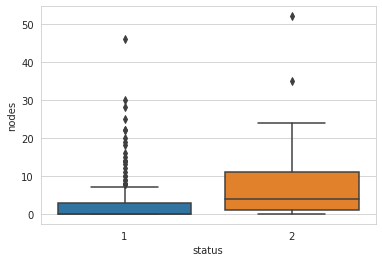

In [ ]:
#Box plot with whiskers
sns.boxplot(x='status', y='nodes', data=haberman)
plt.show()

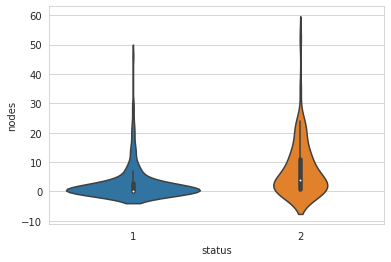

In [ ]:
#violin plot
sns.violinplot(x='status', y='nodes', data= haberman, height= 5)
plt.show()

##Conclusion##
* For survival status 1, axillary nodes are denser in region of 0 to 3
* It is impossibel set threshold as majority of points are overlapping

##Conclusion summary##
* Habermans data is imbalanced dataset with 306 rows and 4 columns
* The patients who survived > 5 years are (73%)
* patients who died within 5 years (27%)

###From 2d scatter plot###
* There is high chance of patients survival more than 5 years if nodes are less than 20 and age <= 40, with 3 misclassified patients.
* In between age 50 to 60, patients who had nodes ==0 are survived > 5 years

###From pair plot###
* nodes and age are the comparitively useful feature 
* But we cannot seperate the status by drawing lines i.e by using if else condition, as they are overlapping

###From PDF###
* of Nodes
* Most of the patients who survived > 5 years have nodes < 5 also majority of the patients who survived < 5 years, are also belongs to the nodes < 5

* of age
* patients who survived > 5 years belong to age group of 30 to 76
* patients who survived < 5 years belong to age group of 35 to 83
* Patients whose age < 33 years survived > 5 years irrespective of nodes.
* Patients whose age > 76 years are not survived > 5 years irrespective of nodes.

* year of operation
* In year 60 to 62 highest patients survived > 5 years 
* In year 64 to 66 lowest patients survived > 5 years